## Introduction

This step focuses on collecting Instacart data, organizing it, and making sure it's well defined. 

## Import Python packages 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## Objectives 

Segment groups from Instacart data to derive insights about custumer purchasing patterns

Instacart data files
- aisles.csv
- departments.csv
- order_products_prior.csv
- order_product_train.csv
- orders.csv
- products.csv
- sample_submission.csv

### Merged Data definitions

- `order_id`: the primary key for orders	
- `product_id`: the primary key for products	
- `add_to_cart_order`: the order products were added to carts per order
- `reordered`: items that were reordered *from the prior purchase
- `product_name`: the name of the product
- `aisle_id`: the primary key for aisles	
- `department_id`:the primary key for departments	
- `user_id`: the primary key for users	
- `eval_set`: ( prior / train / test)
- `order_number`: the ascending counts of orders per user account 
- `order_dow`: the day of the week orders were placed.
- `order_hour_of_day`: the corresponding hour of the day the order was placed. 
- `days_since_prior_order`: the number of days since the most recent order
- `aisle`: the description of the kinds of products. 
- `department`: the aggregate description of aisles and products. 

In [4]:
data_path = "../../raw_data/"

In [5]:
# Read in data file paths and then read in each file 
aisles = pd.read_csv(data_path + 'aisles.csv')
departments = pd.read_csv(data_path + 'departments.csv')
order_products_prior = pd.read_csv(data_path + 'order_products__prior.csv')
order_products_train = pd.read_csv(data_path + 'order_products__train.csv')
orders = pd.read_csv(data_path + 'orders.csv')
products = pd.read_csv(data_path + 'products.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')

## Review summary statistics for data files. 

In [5]:
aisles.info()
aisles.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


(134, 2)

__aisle_id__ should be an object; it's a numeric series that categorizes/indexes(?) each aisle. 

In [6]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [7]:
aisles.head(134)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
departments.info()
departments.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


(21, 2)

__department_id__ should be an object; it's a numeric series that indexes departments.  

In [9]:
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [10]:
departments.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
order_products_train.info()
order_products_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


(1384617, 4)

- __order_id__ and __product_id__ should be an object; it's a numeric series that indexes departments.
- __reordered__ is a boolean (Y/N) value. 

In [7]:
order_products_train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [8]:
order_products_train.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [9]:
max(order_products_train['add_to_cart_order'])

80

In [15]:
order_prodcuts_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [16]:
print(order_products_prior.shape)
order_prodcuts_train.shape

(32434489, 4)


(1384617, 4)

- __order_products_train__ is the training dataset for the order_products_prior dataset. 

In [17]:
orders.info()
orders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


(3421083, 7)

- __order_id__ and __user_id__ should be an object; it's a numeric series that indexes departments.

In [18]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [19]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


- `Orders` is an interesting dataset. The `order_hour_of_day` and `days_since_prior_order` attributes could offer insight into order frequency related to `user_id`. 

In [20]:
products.info()
products.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


(49688, 4)

In [21]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [22]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
sample_submission.info()
sample_submission.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  75000 non-null  int64 
 1   products  75000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


(75000, 2)

In [24]:
sample_submission.describe()

,order_id
count,7.500000e+04
mean,1.709686e+06
std,9.878542e+05
min,1.700000e+01
25%,8.557232e+05
50%,1.710152e+06
75%,2.562794e+06
max,3.421054e+06


In [25]:
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


## Explore the data: Missing data

- __`aisles.csv`__
- __`departments.csv`__
- __`order_products_prior.csv`__
- order_product_train.csv
- __`orders.csv`__
- __`products.csv`__
- sample_submission.csv

In [26]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([aisles.isnull().sum(), 100 * aisles.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
aisle_id,0,0.0
aisle,0,0.0


In [27]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([departments.isnull().sum(), 100 * departments.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
department_id,0,0.0
department,0,0.0


In [28]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
days_since_prior_order,206209,6.027594
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000


In [29]:
#Verify NaN in 'days_since_prior_order' are exlcusively associated with first orders. 
#orders[orders['order_number']==1]
orders[(orders['days_since_prior_order'].isnull()) & (orders['order_number']!=1)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [30]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([products.isnull().sum(), 100 * products.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0


Overall, Instacart data is nearly complete. In the `orders` dataset, 6% of the `days_since_prior_order` are missing. However, these for assoicated with users with only one order. 

In [31]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [32]:
orders.groupby(['user_id']).max('order_number')

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,
1,3367565,11,4,16,30.0
2,3268552,15,5,15,30.0
3,3225766,13,5,19,21.0
4,3343014,6,6,15,30.0
5,2717275,5,3,18,19.0
...,...,...,...,...,...
206205,2658896,4,5,16,30.0
206206,3394383,68,6,20,15.0
206207,3316103,17,6,21,30.0


In [33]:
orders[orders['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [34]:
total_orders = orders.groupby(['user_id']).agg('order_number').sum()
total_orders

user_id
1           66
2          120
3           91
4           21
5           15
          ... 
206205      10
206206    2346
206207     153
206208    1275
206209     105
Name: order_number, Length: 206209, dtype: int64

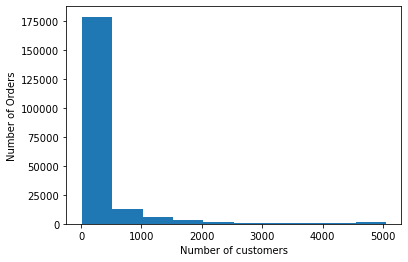

In [35]:
_ = plt.hist(total_orders, bins=10)
_ = plt.xlabel("Number of customers")
_ = plt.ylabel("Number of Orders")

## Merge datasets 

In [11]:
temp = pd.merge(order_products_train, products, on=["product_id"])
temp = pd.merge(temp, orders, on=["order_id"])
temp = pd.merge(temp, aisles, on=["aisle_id"])
data = pd.merge(temp, departments, on=["department_id"])
del temp

data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,1665159,41689,1,1,Liqueur,124,5,29074,train,10,4,13,19.0,spirits,alcohol
1384613,1436874,24325,1,1,Noir Orange Liqueur & Cognac,124,5,13457,train,7,0,10,6.0,spirits,alcohol
1384614,2544765,21212,1,0,Kentucky Straight Bourbon Whisky,124,5,144202,train,6,0,14,30.0,spirits,alcohol
1384615,3248198,1190,1,1,Tequila Reposado with Glass,124,5,61549,train,32,6,15,7.0,spirits,alcohol


In [12]:
data['order_id'] = data.order_id.astype(object)
data['product_id'] = data.product_id.astype(object)
data['department_id'] = data.department_id.astype(object)
data['user_id'] = data.user_id.astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  object 
 1   product_id              1384617 non-null  object 
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int64  
 6   department_id           1384617 non-null  object 
 7   user_id                 1384617 non-null  object 
 8   eval_set                1384617 non-null  object 
 9   order_number            1384617 non-null  int64  
 10  order_dow               1384617 non-null  int64  
 11  order_hour_of_day       1384617 non-null  int64  
 12  days_since_prior_order  1384617 non-null  float64
 13  aisle                   1384617 non-null  object 
 14  de

In [13]:
# save the data to a new csv file
datapath = '../../data'
save_file(data, 'instacart_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../../data/instacart_data.csv"
